#### Importing file & reading

In [24]:
#importing necessary libraries and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#reading the csv file using panda
df= pd.read_csv("ford.csv")

In [26]:
display(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,48.7,1.0


#### Checking for null_type values if exists

In [27]:
# Checking basic infos

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17964 entries, 0 to 17963
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17964 non-null  object 
 1   year          17964 non-null  int64  
 2   price         17964 non-null  int64  
 3   transmission  17964 non-null  object 
 4   mileage       17964 non-null  int64  
 5   fuelType      17964 non-null  object 
 6   mpg           17964 non-null  float64
 7   engineSize    17964 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 1.1+ MB


None

#### Checking number of unique values for different colums

In [28]:
#Checking number of unique "Models" existing in the data

df['model'].value_counts()

 Fiesta                   6556
 Focus                    4588
 Kuga                     2225
 EcoSport                 1143
 C-MAX                     543
 Ka+                       531
 Mondeo                    526
 B-MAX                     355
 S-MAX                     296
 Grand C-MAX               247
 Galaxy                    228
 Edge                      208
 KA                        199
 Puma                       80
 Tourneo Custom             69
 Grand Tourneo Connect      59
 Mustang                    57
 Tourneo Connect            33
 Fusion                     16
 Streetka                    2
 Ranger                      1
 Transit Tourneo             1
 Escort                      1
Name: model, dtype: int64

In [29]:
#Checking Total Number of Unique Models presented in the data

total_models= len(df['model'].unique())

print("Total number of unique models data presented is : ", total_models )

Total number of unique models data presented is :  23


In [30]:
#Checking Total Number of Unique Years' data presented

df['year'].value_counts()

2017    4888
2018    4014
2019    3194
2016    2331
2015    1367
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2003       3
2002       3
1996       1
1998       1
2000       1
Name: year, dtype: int64

In [31]:
#Checking total number of years' presented in the data

total_years= len(df['year'].unique())

print("Total number of years' data presented is : ", total_years )

Total number of years' data presented is :  22


In [32]:
#Checking Number of Unique Transmission Methods existing in the data

df['transmission'].value_counts()

Manual       15517
Automatic     1360
Semi-Auto     1087
Name: transmission, dtype: int64

In [33]:
#Checking Total Number of Transmission Types presented in the data

total_transmission= len(df['transmission'].unique())

print("Total number of unique transmission types existing in the data is : ", total_transmission )

Total number of unique transmission types existing in the data is :  3


In [34]:
#Checking number of unique fueltype methods existing in the data

df['fuelType'].value_counts()

Petrol      12177
Diesel       5762
Hybrid         22
Electric        2
Other           1
Name: fuelType, dtype: int64

#### Percentage of fueltype datas

In [35]:
#Checking unique value as normalized and setting a variable
fuelType_count = df['fuelType'].value_counts(normalize=True)

#creating a dataframe with the data
fuelType_count = fuelType_count.reset_index()

#Renaming the index for the dataframe
fuelType_count = fuelType_count.rename(columns= {'index': 'fuelType', 'fuelType': '% of Cars'} )

#Making column of 100%
fuelType_count['% of Cars'] = fuelType_count['% of Cars']*100

fuelType_count['% of Cars'] = np.round(fuelType_count['% of Cars'],2)

display(fuelType_count)

,fuelType,% of Cars
0,Petrol,67.79
1,Diesel,32.08
2,Hybrid,0.12
3,Electric,0.01
4,Other,0.01


#### Creating Barplot with fuel type

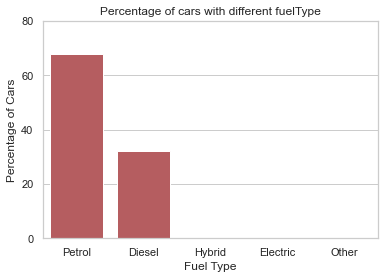

In [36]:
sns.set_theme(style="whitegrid")
sns.barplot(x="fuelType", y="% of Cars", data=fuelType_count, color='r')
plt.title("Percentage of cars with different fuelType")
plt.yticks(np.arange(0,100,20))
plt.xlabel("Fuel Type")
plt.ylabel("Percentage of Cars")
plt.show()

#### Percentage of Transmission method

In [37]:
#Checking unique value as normalized and setting a variable
transmission_count = df['transmission'].value_counts(normalize=True)

#creating a dataframe with the data
transmission_count = pd.DataFrame(transmission_count)

#Resetting the index for the dataframe
transmission_count = transmission_count.reset_index()

#Renaming the index for the dataframe
transmission_count = transmission_count.rename(columns= {'index': 'transmission Type', 'transmission': '% of Cars'} )

#Making column of 100%
transmission_count['% of Cars'] = transmission_count['% of Cars']*100

transmission_count['% of Cars'] = transmission_count['% of Cars'].round(2)

display(transmission_count)

,transmission Type,% of Cars
0,Manual,86.38
1,Automatic,7.57
2,Semi-Auto,6.05


#### Creating Barplot for Transmission Type

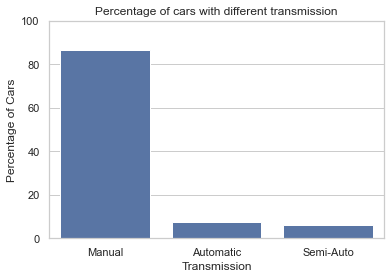

In [38]:
sns.set_theme(style="whitegrid")
sns.barplot(x="transmission Type", y="% of Cars", data=transmission_count, color='b')
plt.title("Percentage of cars with different transmission")
plt.yticks(np.arange(0,101,20))
plt.xlabel("Transmission")
plt.ylabel("Percentage of Cars")
plt.show()

#### Percentage of Car models

In [39]:
#Checking unique value as normalized and setting a variable
model_count = df['model'].value_counts(normalize=True)

#creating a dataframe with the data
model_count = pd.DataFrame(model_count)

#Resetting the index for the dataframe
model_count = model_count.reset_index()

#Renaming the index for the dataframe
model_count = model_count.rename(columns= {'index': 'model', 'model': '% of Cars'} )

#Making column of 100%
model_count['% of Cars'] = model_count['% of Cars']*100

model_count['% of Cars'] = np.round(model_count['% of Cars'],2)

display(model_count)

,model,% of Cars
0,Fiesta,36.50
1,Focus,25.54
2,Kuga,12.39
3,EcoSport,6.36
4,C-MAX,3.02
5,Ka+,2.96
6,Mondeo,2.93
7,B-MAX,1.98
8,S-MAX,1.65
9,Grand C-MAX,1.37


#### Creating Barplot of Car Models

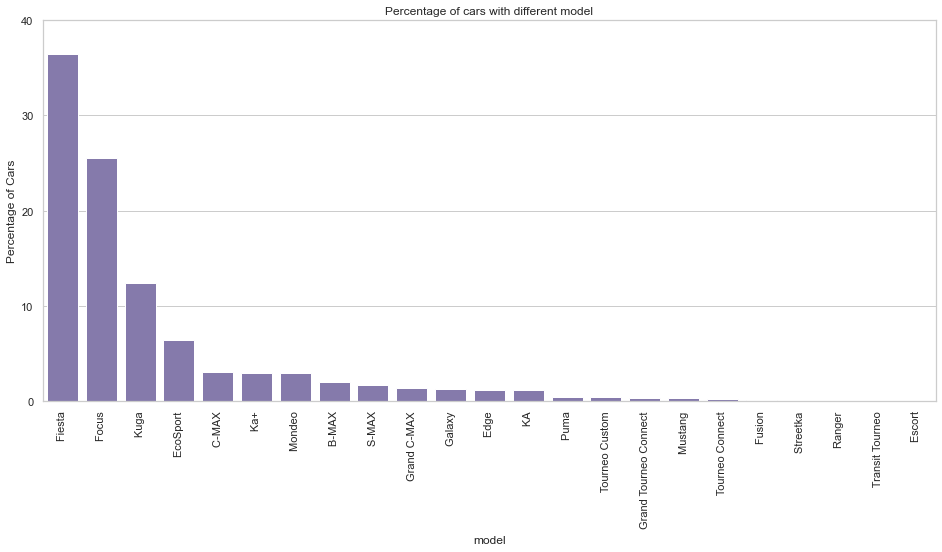

In [40]:
plt.figure(figsize=(16,7))
sns.set_theme(style="whitegrid")
sns.barplot(x="model", y="% of Cars", data=model_count, color='m')
plt.title("Percentage of cars with different model")
plt.yticks(np.arange(0,41,10))
plt.xticks(rotation=90)
plt.xlabel("model")
plt.ylabel("Percentage of Cars")

plt.show()

#### Creating subplots

In [41]:
#plt.figure(figsize=(16,6))

#plt.subplot(1,3,1)
#sns.barplot(x="model", y="% of Cars", data=model_count, color='m')
#plt.title("Percentage of cars with different model")
#plt.yticks(np.arange(0,101,10))
#plt.xticks(rotation=90)
#plt.xlabel("Models")
#plt.ylabel("Percentage of Cars")


#plt.subplot(1,3,2)
#sns.barplot(x="transmission Type", y="% of Cars", data=transmission_count, color='b')
#plt.title("Percentage of cars with different transmission")
#plt.yticks(np.arange(0,101,10))
#plt.xlabel("transmission")
#plt.ylabel("Percentage of Cars")


#plt.subplot(1,3,3)
#sns.barplot(x="fuelType", y="% of Cars", data=fuelType_count, color='r')
#plt.title("Percentage of cars with different fuelType")
#plt.yticks(np.arange(0,101,10))
#plt.xlabel("Fuel Type")
#plt.ylabel("Percentage of Cars")

#plt.suptitle("Categorial Columns In The FORD Used Cars")
#sns.set_theme(style="whitegrid")
#plt.tight_layout()
#plt.show()

#### Creating a function to build a dataframe and finding observations

In [49]:
def percent_count_df(data, col):
    
    col_count = data[col].value_counts(normalize=True)
    col_count = pd.DataFrame(col_count)
    col_count = col_count.reset_index()
    col_count = col_count.rename(columns= {'index':col, col: '% of Cars'} )
    col_count['% of Cars'] = col_count['% of Cars']*100
    col_count['% of Cars'] = col_count['% of Cars'].round(2)
    
    return col_count

In [50]:
fuelType_count = percent_count_df(df, 'fuelType')
transmission_count = percent_count_df(df, 'transmission')
model_count = percent_count_df(df, 'model')

In [51]:
year_count = percent_count_df(df, 'year')
year_count = year_count.sort_values(by='year')
#display(year_count.head())

#### Creating function for barplot

In [52]:
def barplot(data, x_column, y_column, color, yticks, rotation, palette):
    sns.barplot(x=x_column, y=y_column, data=data, color=color, palette=palette)
    plt.title("Percentage of cars with different " + x_column)
    plt.yticks(yticks)
    plt.xticks(rotation=rotation)
    plt.xlabel(x_column)
    plt.ylabel("Percentage of Cars")

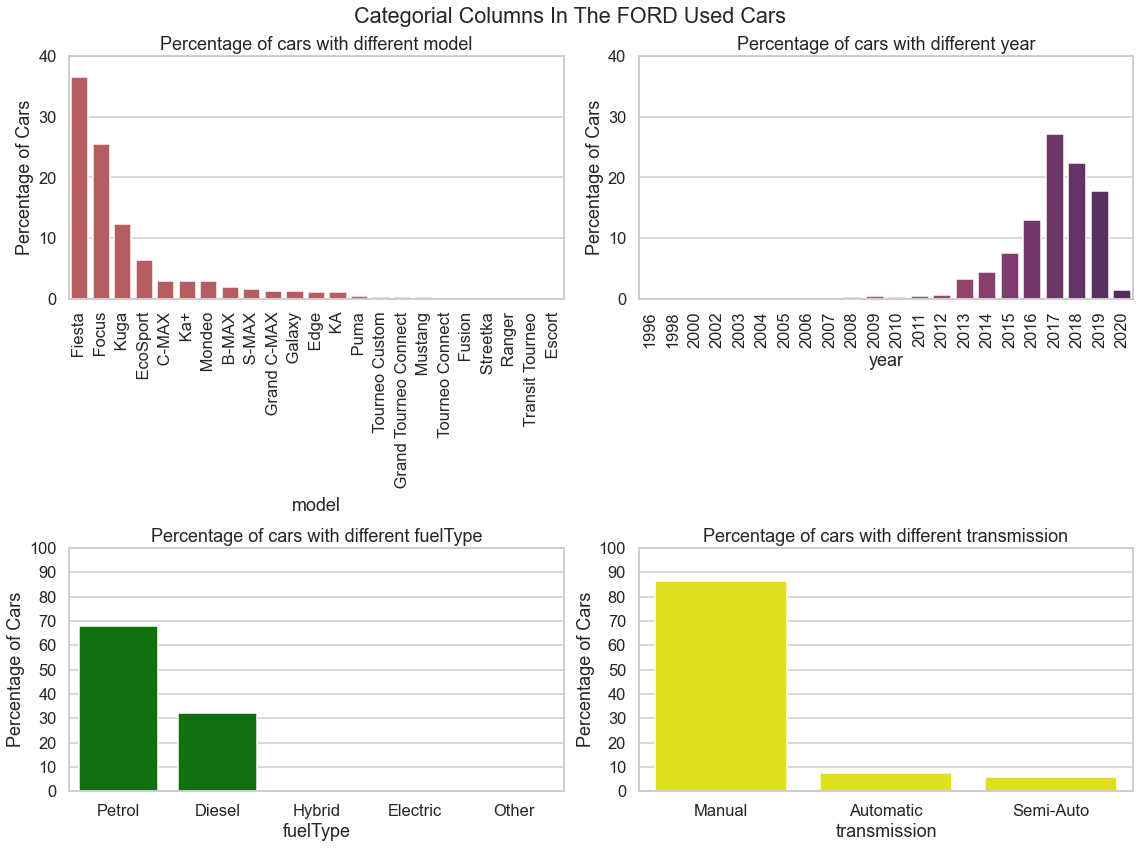

In [54]:
sns.set_context("talk")
plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
barplot(model_count, 'model', '% of Cars', 'r', np.arange(0,41,10), 90, None )


plt.subplot(2,2,4)
barplot(transmission_count, 'transmission', '% of Cars', 'yellow', np.arange(0,101,10), 0, None )


plt.subplot(2,2,3)
barplot(fuelType_count, 'fuelType', '% of Cars', 'green', np.arange(0,101,10), 0, None)

plt.subplot(2,2,2)
barplot(year_count, 'year', '% of Cars', 'blue', np.arange(0,41,10), 90, "flare")

plt.suptitle("Categorial Columns In The FORD Used Cars")
sns.set_theme(style="whitegrid")
plt.tight_layout()
plt.show()